# LSTM

## Importing Libraries

In [ ]:
# working on dataframe
import pandas as pd

# mathematical calculation
import numpy as np

# plotting graphs
import matplotlib.pyplot as plt

# text processing
import nltk

# regex expression
import re

# ML and staistical model tools are present here
import sklearn

# to obtain a list of stopwords
from nltk.corpus import stopwords

# For tokenization
from nltk.tokenize import word_tokenize

# For lemmatization
from nltk.stem import WordNetLemmatizer

# for splitting dataset
from sklearn.model_selection import train_test_split

import keras

# to encode text to int
from keras.preprocessing.text import Tokenizer

# to do padding
from keras.preprocessing.sequence import pad_sequences

# for saving ML models
from keras.callbacks import ModelCheckpoint

# for modelsequencing the layers
from keras import Sequential

# layers of the architecture
from keras.layers import Embedding, LSTM, Dense, Dropout

# for loading saved model
from tensorflow.keras.models import load_model

# for determining metrics plotting confusion matrix
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc, classification_report

In [ ]:
from transformers import DistilBertTokenizer, DistilBertModel
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abhishek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhishek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Abhishek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# importing Dataset

In [ ]:
imdb_df = pd.read_csv('IMDB Dataset.csv')
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


# Checking Null Values and droping them if present using 5 % rule

In [ ]:
imdb_df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
imdb_df.dropna(inplace=True)
display(imdb_df.isnull().sum())

review       0
sentiment    0
dtype: int64

# Plotting label Distribution Graphs

(25000, 2)

(25000, 2)

Text(0.5, 1.0, 'Sentiment Distribution')

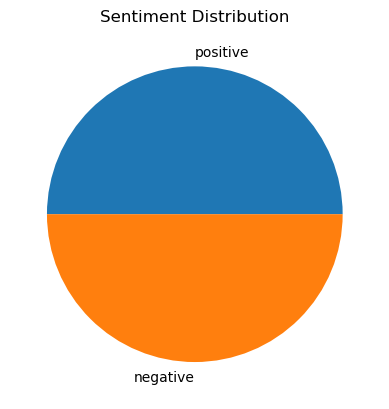

In [ ]:
positive = imdb_df.loc[imdb_df['sentiment'] == 'positive']
negative = imdb_df.loc[imdb_df['sentiment'] == 'negative']
display(positive.shape)
display(negative.shape)
plt.pie([len(positive),len(negative)], labels = imdb_df['sentiment'].unique())
plt.title('Sentiment Distribution')

# Check for duplicates amd drop them if present

In [ ]:
imdb_df.duplicated().sum()

418

(24884, 2)

(24698, 2)

Text(0.5, 1.0, 'Sentiment Distribution')

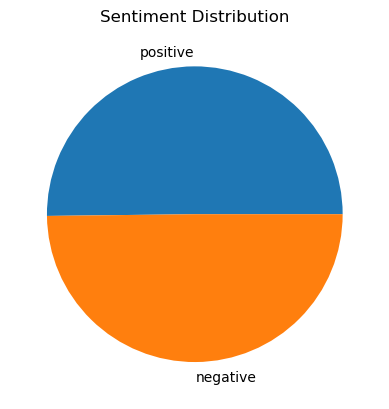

In [ ]:
imdb_df.drop_duplicates(inplace=True)
positive = imdb_df.loc[imdb_df['sentiment'] == 'positive']
negative = imdb_df.loc[imdb_df['sentiment'] == 'negative']
display(positive.shape)
display(negative.shape)
plt.pie([len(positive),len(negative)], labels = imdb_df['sentiment'].unique())
plt.title('Sentiment Distribution')

# Data Preprocessing

In [ ]:
stop_words = set(stopwords.words('english'))
word_net_lemmatizer = WordNetLemmatizer()

In [ ]:
def lower_casing(text):
    return text.lower()

def tokenization(text):
    text_tokens = word_tokenize(text)
    #Stop Word Removal
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return filtered_text

def lemmatization(text):
    text = [word_net_lemmatizer.lemmatize(word) for word in text]
    return text

def data_processing(text):
    # Lowering the Text
    text = lower_casing(text)
    text = re.sub('<br />', '', text)
    text = re.sub('<.*?>','',text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    #Tokenizing the sentences
    text = tokenization(text)
    #lemmatizing the words
    text = lemmatization(text)
#     print(text)
    return text

In [ ]:
imdb_df['review'] = imdb_df['review'].replace({'[^A-Za-z]': ' '}, regex = True)
imdb_df['reviews'] = imdb_df['review'].apply(data_processing)

In [ ]:
# Encoding output to numerical values
imdb_df.sentiment.replace("positive", 1, inplace=True)
imdb_df.sentiment.replace("negative", 0, inplace=True)

In [ ]:
def mean_length():
    review_length = []
    for review in imdb_df['reviews']:
        review_length.append(len(review))

    return int(np.ceil(np.mean(review_length)))
max_length = mean_length()
max_length

123

In [ ]:
tokenizer = Tokenizer(lower=False)
tokenizer.fit_on_texts(imdb_df['reviews'])

x = tokenizer.texts_to_sequences(imdb_df['reviews'])
x = pad_sequences(x, maxlen=max_length, padding='post', truncating='post')
total_words = len(tokenizer.word_index) + 1
total_words

89732

# Model Architecture

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 32, input_length = max_length))
model.add(LSTM(64))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 123, 32)           2871424   
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2913153 (11.11 MB)
Trainable params: 2913153 (11.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# Splitting Dataset in training and testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, imdb_df['sentiment'], test_size = 0.2, shuffle=True)

# Fitting and saving best model

In [ ]:
checkpoint = ModelCheckpoint(
    'models/LSTM.h5',
    monitor='accuracy',
    save_best_only=True,
    verbose=1
)

In [ ]:
history = model.fit(x_train, y_train, epochs = 5, batch_size=128,callbacks=[checkpoint], validation_split=0.2)

Epoch 1/5
248/248 [==============================] - ETA: 0s - loss: 0.5172 - accuracy: 0.7008
Epoch 1: accuracy improved from -inf to 0.70081, saving model to models\LSTM.h5


E:\anaconda3\envs\rk\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


248/248 [==============================] - 50s 179ms/step - loss: 0.5172 - accuracy: 0.7008 - val_loss: 0.3155 - val_accuracy: 0.8713
Epoch 2/5
248/248 [==============================] - ETA: 0s - loss: 0.2211 - accuracy: 0.9193
Epoch 2: accuracy improved from 0.70081 to 0.91932, saving model to models\LSTM.h5
248/248 [==============================] - 40s 163ms/step - loss: 0.2211 - accuracy: 0.9193 - val_loss: 0.3084 - val_accuracy: 0.8718
Epoch 3/5
248/248 [==============================] - ETA: 0s - loss: 0.1322 - accuracy: 0.9561
Epoch 3: accuracy improved from 0.91932 to 0.95613, saving model to models\LSTM.h5
248/248 [==============================] - 41s 163ms/step - loss: 0.1322 - accuracy: 0.9561 - val_loss: 0.3516 - val_accuracy: 0.8652
Epoch 4/5
248/248 [==============================] - ETA: 0s - loss: 0.0849 - accuracy: 0.9747
Epoch 4: accuracy improved from 0.95613 to 0.97466, saving model to models\LSTM.h5
248/248 [==============================] - 40s 161ms/step - loss

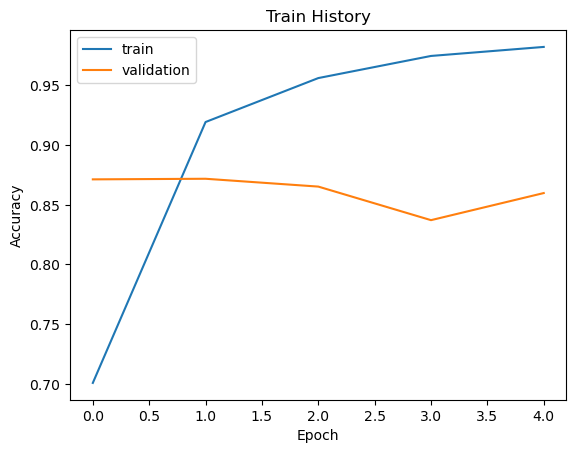

In [ ]:
# Accuracy vs Epoch graph
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
show_train_history(history,'accuracy','val_accuracy')

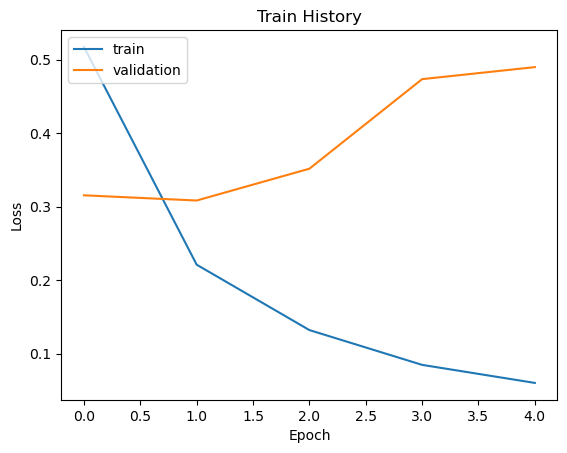

In [ ]:
# Loss vs Epoch graph
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
show_train_history(history,'loss','val_loss')

In [ ]:
# Evaluate model
score, acc = model.evaluate(x_test, y_test)
print('The accuracy of the model on the test set is ', acc*100)

310/310 [==============================] - 7s 22ms/step - loss: 0.4983 - accuracy: 0.8557
The accuracy of the model on the test set is  85.57023406028748


In [ ]:
# Confusion matrix and classification report
prediction = model.predict(x_test)
y_pred = (prediction > 0.5)
print('\nF1-score: ', (f1_score(y_test,y_pred)*100))
print('\nConfusion matrix:')
print(confusion_matrix(y_test,y_pred))
print('\nClassification Report:')
print(classification_report(y_test,y_pred))

310/310 [==============================] - 7s 20ms/step

F1-score:  85.45288197621227

Confusion matrix:
[[4283  638]
 [ 793 4203]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      4921
           1       0.87      0.84      0.85      4996

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917



In [ ]:
def predict_prob(number):
  return [1-number[0],number[0]]

y_prob = np.array(list(map(predict_prob, model.predict(x_test))))
# y_prob

310/310 [==============================] - 6s 21ms/step


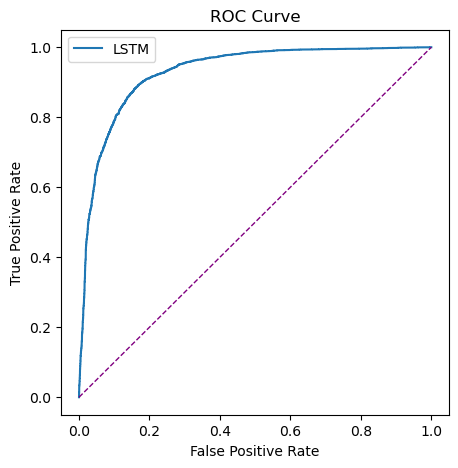

In [ ]:
fpr, tpr, _ = roc_curve(y_test,y_prob[:, 1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label='LSTM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='purple', lw=1, linestyle='--')
plt.title('ROC Curve')
plt.legend()
plt.show()